In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from scipy.stats import ttest_ind


online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)


X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets


merged_df = pd.concat([X, y], axis=1)

print(merged_df.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [5]:
merged_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

This is an interesting and fun dataset, with some great opportunities for insights. Here, we have a few items that are important to consider. Based on the description of this data, lets consider the following variables:

1) Administrative - Pertains to the type of webpage visited, and the count.
2) Administrative Duration - Represents the duration of time spent on the website.
3) Informational - Pertains to the type of webpage visited (informational), and the count.
4) Informational Duration - duration of time spent on these types of websites.
5) Product Related - This would be a product related website.
6) Product Duration of time on a product related website.
7) Bounce Rates - % of time the user left after visiting the first page. 
8) Exit Rates - % of time the webpage was the last one visited. 
9) Page Values - The average value for a web page that a user visited before completing an e-commerce transaction
10) Special Day - Closeness of purchase to a special day
11) Month - Month of purchase.
12) Operating Systems - OS of the user. 
13) Browser - Browser type
14) Region - Region of the purchaser
15) Traffic Type - Source type 
16) Visitor Type - returning or new customer. 
17) Weekend - Purchase on a weekend or weekday. 
18) Revenue - Amount of purchase. 


<function matplotlib.pyplot.show(close=None, block=None)>

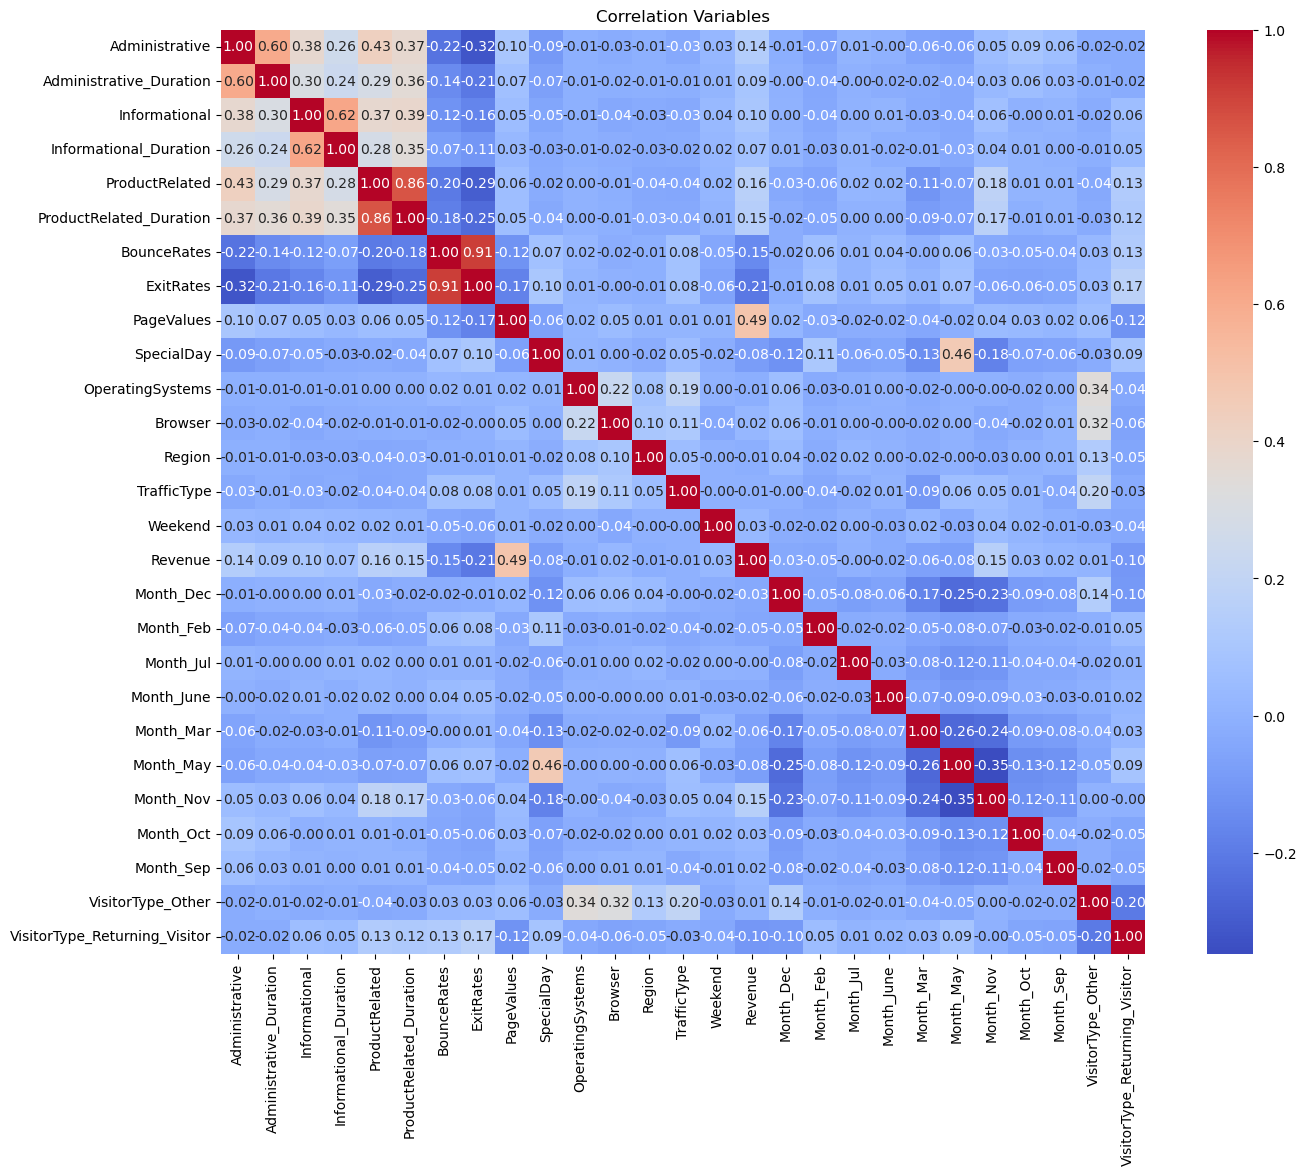

In [11]:
df_encoded = pd.get_dummies(merged_df, drop_first = True)
corr = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap = "coolwarm", square=True, cbar=True)
plt.title("Correlation Variables")
plt.tight_layout
plt.show

In [ ]:
Some weak correlations exist within the dataset, with stronger correlations being between different measures of the same variable (i.e. count of website vs. duration). One notable moderation correlation exists between page values and revenue. This may benefit from a further analysis of how revenue is distributed across these variables.   

<Axes: xlabel='Revenue', ylabel='count'>

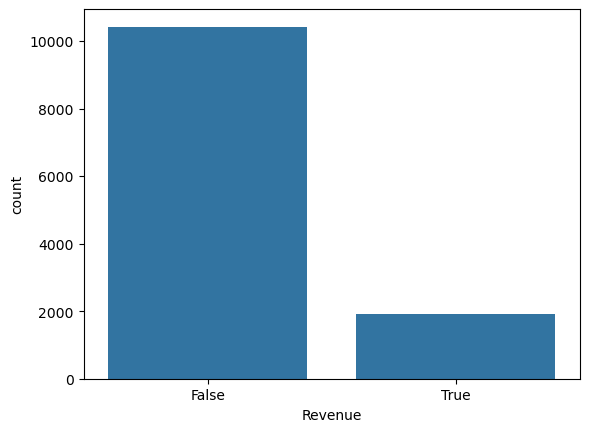

In [157]:
sns.countplot(data=merged_df, x="Revenue")

<Axes: xlabel='Revenue', ylabel='PageValues'>

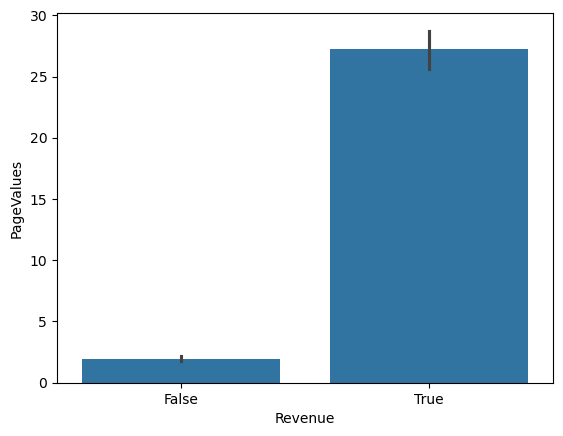

In [314]:
sns.barplot(data=merged_df, x="Revenue", y="PageValues")

In [163]:
print(merged_df['Revenue'].value_counts())
purchase_rate = merged_df['Revenue'].mean()
print(f"purchase likelihood: {purchase_rate * 100:.2f}%")

Revenue
False    10422
True      1908
Name: count, dtype: int64
purchase likelihood: 15.47%


<Axes: xlabel='OperatingSystems', ylabel='count'>

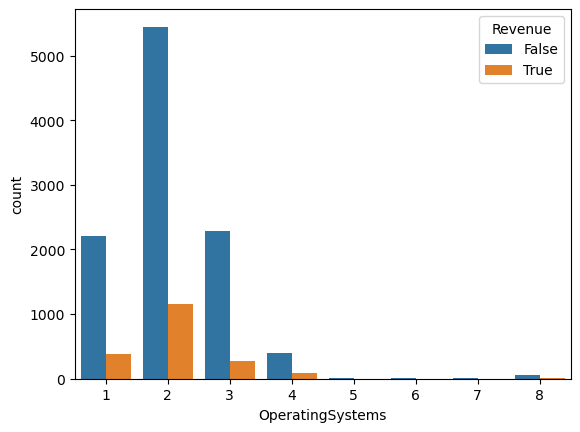

In [301]:
sns.countplot(data=merged_df, x="OperatingSystems", hue="Revenue")

<Axes: xlabel='OperatingSystems', ylabel='Revenue'>

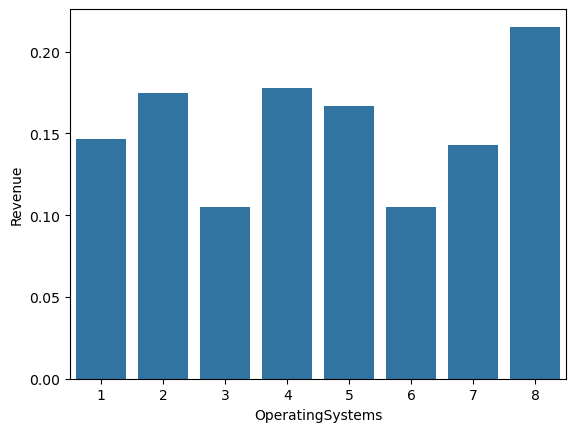

In [222]:
sns.barplot(data=merged_df, x="OperatingSystems", y="Revenue", errorbar=None)

<Axes: xlabel='OperatingSystems', ylabel='PageValues'>

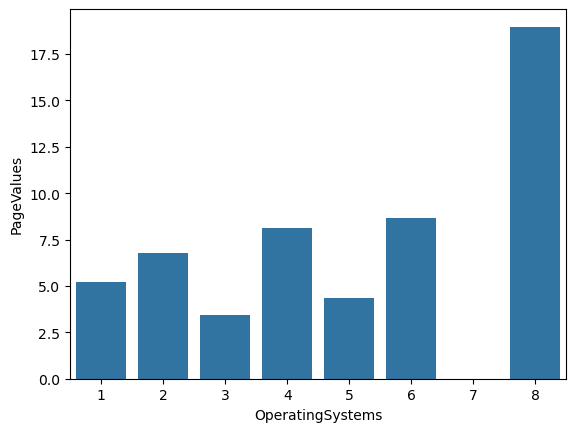

In [404]:
sns.barplot(data=merged_df, x="OperatingSystems", y="PageValues", errorbar=None)

<Axes: xlabel='OperatingSystems', ylabel='PageValues'>

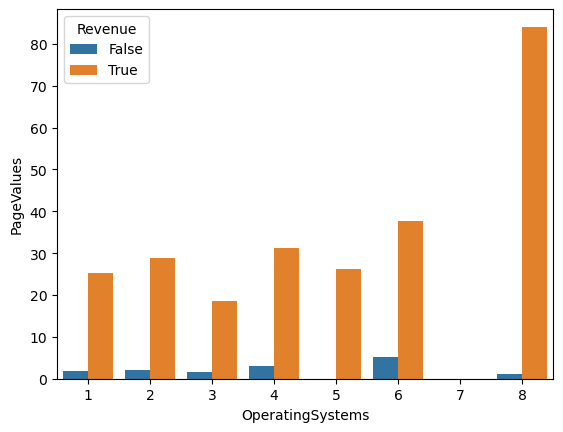

In [318]:
sns.barplot(data=merged_df, x="OperatingSystems", y="PageValues", hue="Revenue", errorbar=None)

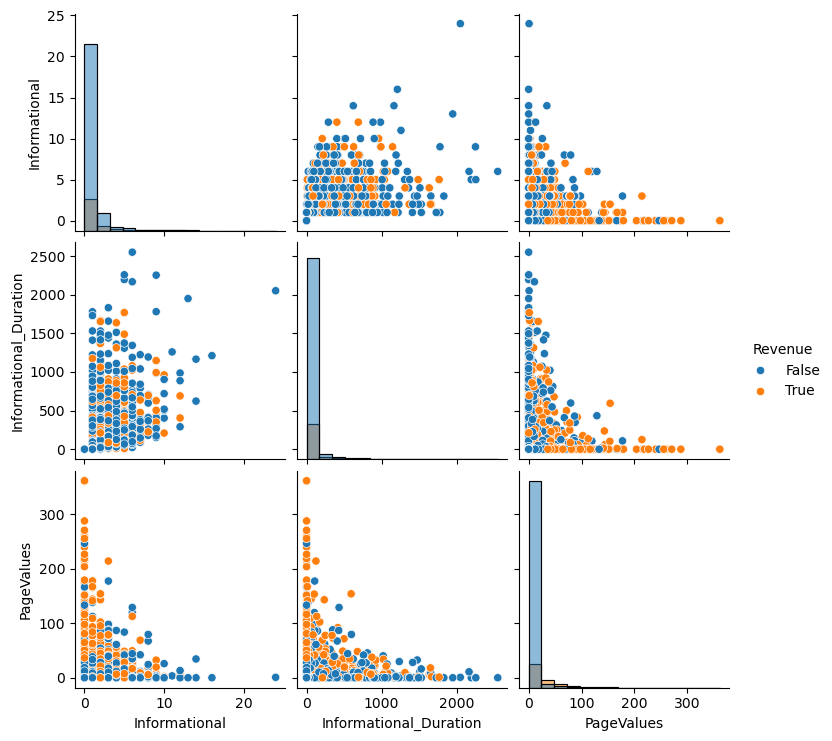

In [360]:
sns.pairplot(merged_df, vars=["Informational", "Informational_Duration", "PageValues"], hue="Revenue", diag_kind="hist")

          conversion_rate  avg_pagevalues  total_pagevalues
has_info                                                   
False            0.133519        5.327895      51675.251306
True             0.232991        7.958684      20939.298141


Text(0.5, 1.0, 'Conversion Rate: Visited Informational vs Not')

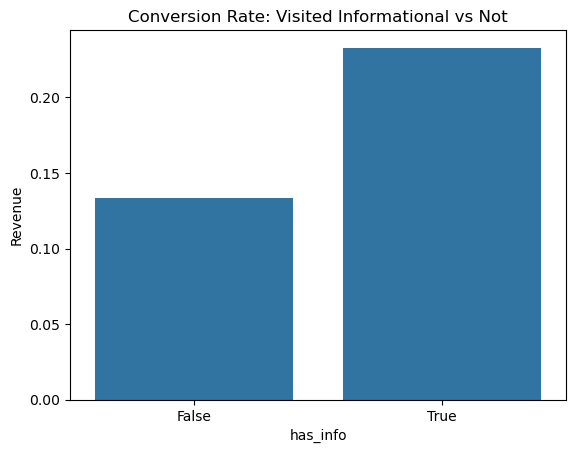

In [394]:
df = merged_df.copy()
df["has_info"] = (df["Informational"] > 0) | (df["Informational_Duration"] > 0)

cr = df.groupby("has_info")["Revenue"].mean().rename("conversion_rate")

rev_mean = df.groupby("has_info")["PageValues"].mean().rename("avg_pagevalues")
rev_sum  = df.groupby("has_info")["PageValues"].sum().rename("total_pagevalues")

summary = pd.concat([cr, rev_mean, rev_sum], axis=1)
print(summary)

sns.barplot(data=df, x="has_info", y="Revenue", estimator=np.mean, errorbar=None)
plt.title("Conversion Rate: Visited Informational vs Not")


Text(0.5, 1.0, 'Avg PageValues by Informational Visit')

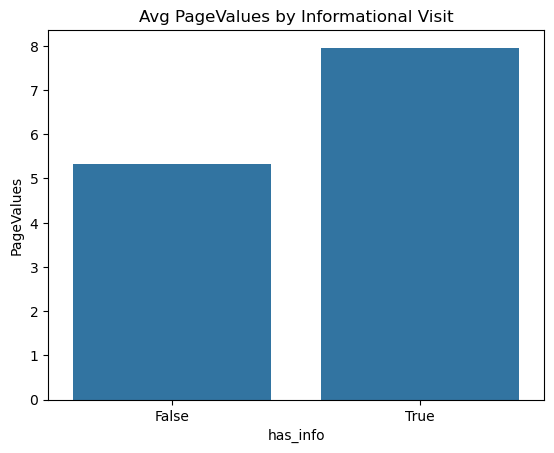

In [396]:
sns.barplot(data=df, x="has_info", y="PageValues", estimator=np.mean, errorbar=None)
plt.title("Avg PageValues by Informational Visit")

In [398]:
g1 = merged_df.loc[merged_df["Informational"] > 0, "PageValues"]   # visited
g0 = merged_df.loc[merged_df["Informational"] == 0, "PageValues"] # did not visit
t_stat, p_val = ttest_ind(g1, g0, equal_var=False)
print(f"T-statistic = {t_stat:.2f}, p = {p_val:.4g}")
print(f"Mean PageValues (visited) = {g1.mean():.2f}")
print(f"Mean PageValues (not visited) = {g0.mean():.2f}")

T-statistic = 6.54, p = 7.086e-11
Mean PageValues (visited) = 7.96
Mean PageValues (not visited) = 5.33


<Axes: xlabel='has_info', ylabel='count'>

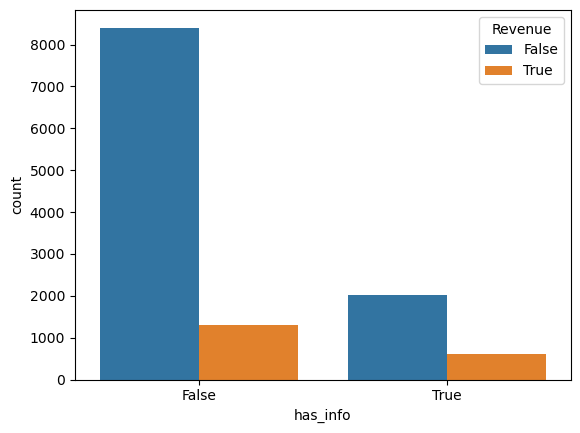

In [392]:
sns.countplot(
    data=df,
    x="has_info",
    hue="Revenue"
)

<Axes: xlabel='Revenue', ylabel='Informational'>

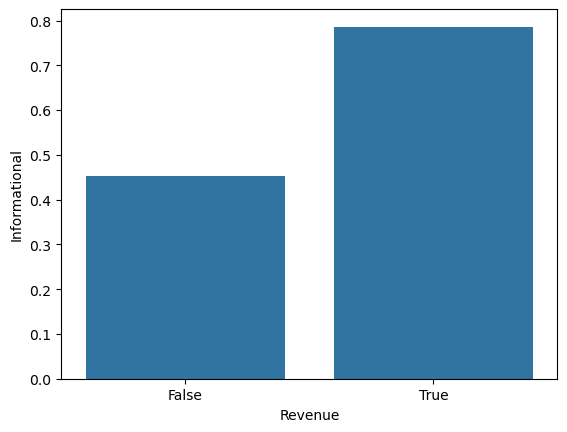

In [408]:
sns.barplot(data=merged_df, x = "Revenue", y = "Informational_Duration", errorbar=None)

Some interesting features to consider about inforational webpages here, that could indicate some qualities of user behavior. In general, it seems that more sales associated with no visits to informational pages. Meaning that users typically bypass these pages when making a purchase. However, for those users who do visit informational webpages, visiting for longer durations lead to increase in likelihood of sales. The same is observed for users who visit more informational pages regarding a product. 

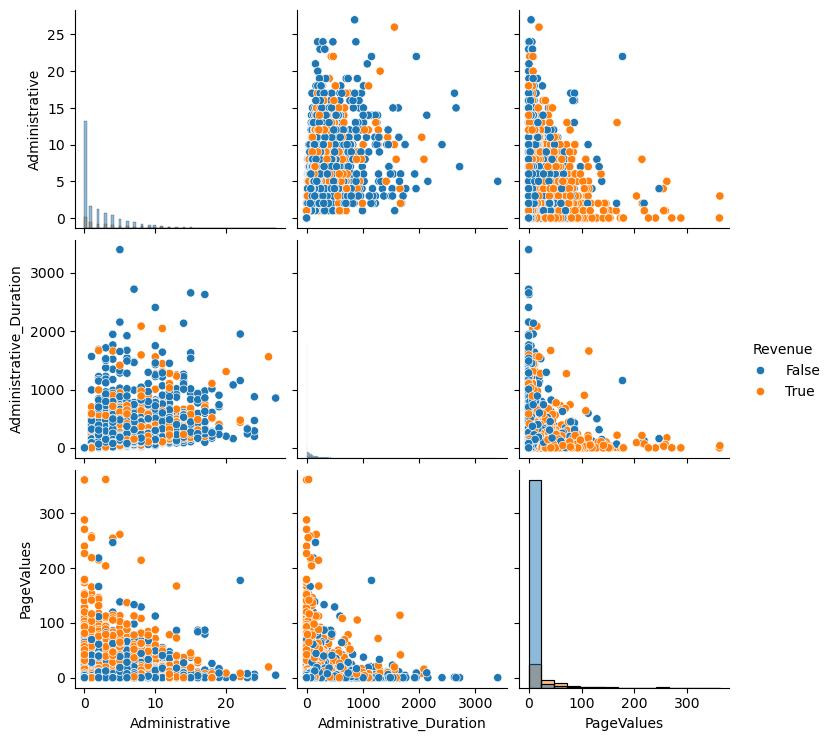

In [406]:
sns.pairplot(merged_df, vars=["Administrative", "Administrative_Duration", "PageValues"], hue="Revenue", diag_kind="hist")

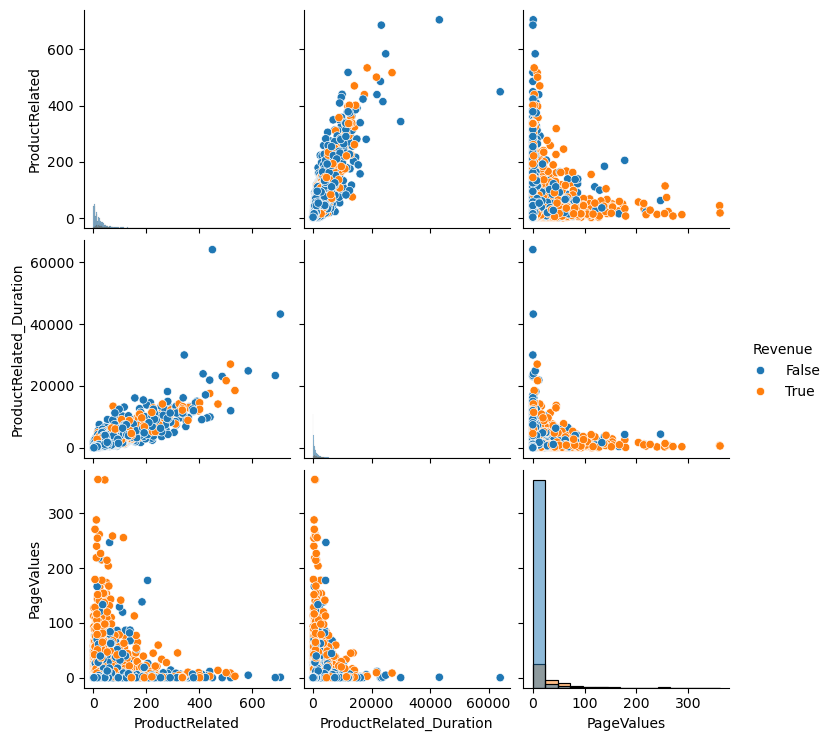

In [412]:
sns.pairplot(merged_df, vars=["ProductRelated", "ProductRelated_Duration", "PageValues"], hue="Revenue", diag_kind="hist")

Similar patterns are noted with visits to informationa

<Axes: xlabel='Month', ylabel='count'>

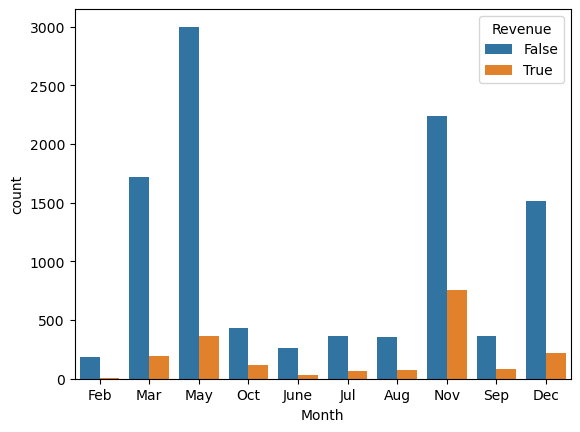

In [234]:
sns.countplot(data=merged_df, x="Month", hue = "Revenue")

<Axes: xlabel='Month', ylabel='Revenue'>

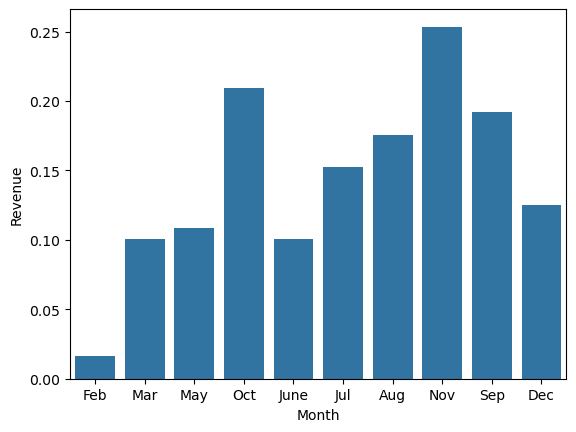

In [246]:
sns.barplot(data=merged_df, x="Month", y = "Revenue", errorbar=None)

<Axes: xlabel='Month', ylabel='PageValues'>

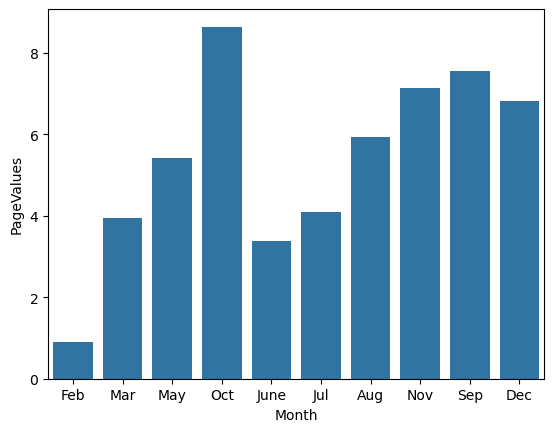

In [428]:
sns.barplot(data=merged_df, x="Month", y = "PageValues", errorbar=None)

<Axes: xlabel='VisitorType', ylabel='count'>

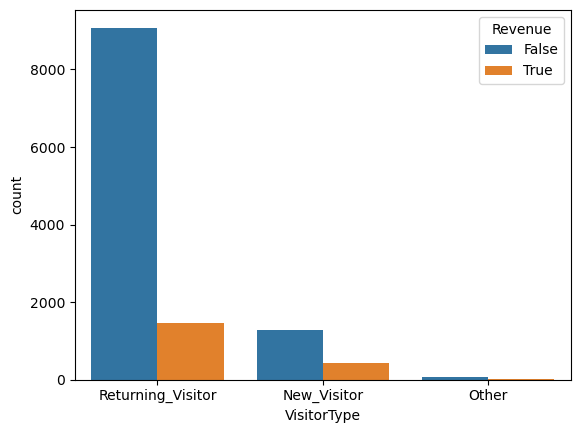

In [250]:
sns.countplot(data=merged_df, x="VisitorType", hue = "Revenue")

<Axes: xlabel='VisitorType', ylabel='Revenue'>

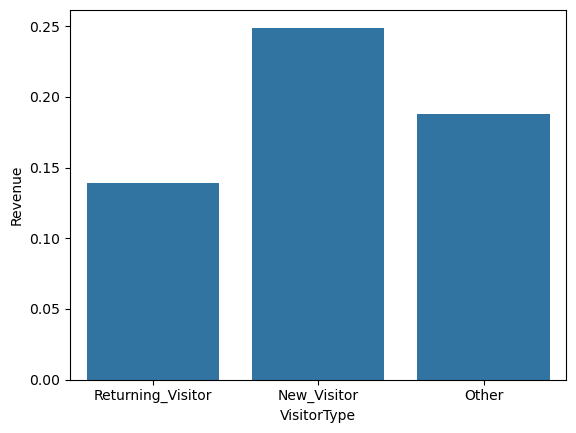

In [254]:
sns.barplot(data=merged_df, x="VisitorType", y = "Revenue", errorbar=None)

<Axes: xlabel='VisitorType', ylabel='PageValues'>

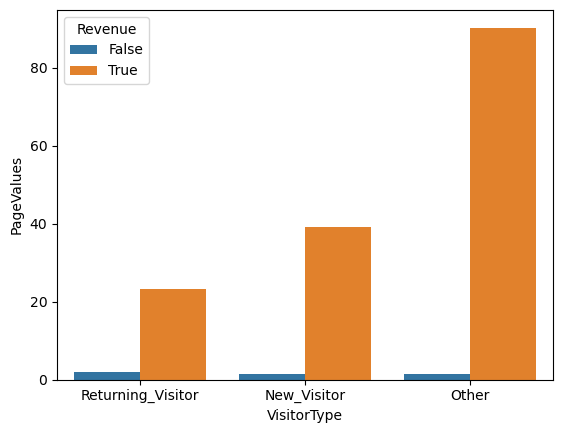

In [432]:
sns.barplot(data=merged_df, x="VisitorType", y = "PageValues", hue="Revenue", errorbar=None)

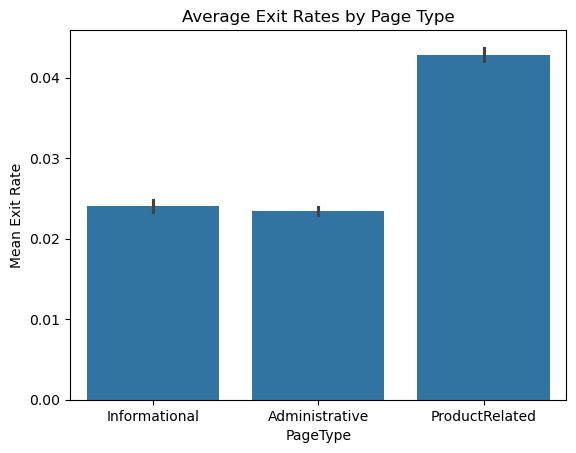

In [456]:
summary = {
    "Informational": merged_df.loc[merged_df["Informational"] > 0, "ExitRates"].mean(),
    "Administrative": merged_df.loc[merged_df["Administrative"] > 0, "ExitRates"].mean(),
    "ProductRelated": merged_df.loc[merged_df["ProductRelated"] > 0, "ExitRates"].mean()
}

pd.Series(summary).sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

df_long = pd.melt(
    merged_df,
    id_vars=["ExitRates"],
    value_vars=["Informational", "Administrative", "ProductRelated"],
    var_name="PageType",
    value_name="Count"
)

df_long = df_long[df_long["Count"] > 0]

sns.barplot(data=df_long, x="PageType", y="ExitRates", estimator=np.mean, errorbar="ci")
plt.title("Average Exit Rates by Page Type")
plt.ylabel("Mean Exit Rate")
plt.show()



Administrative    8.119196
Informational     7.958684
ProductRelated    5.907464
dtype: float64


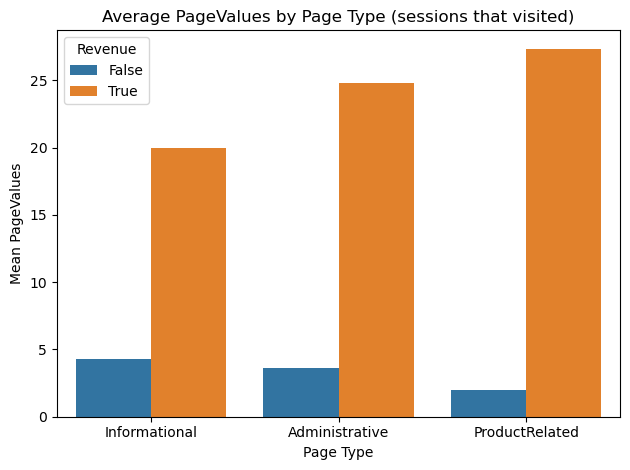

In [464]:
summary = {
    "Informational": merged_df.loc[merged_df["Informational"] > 0, "PageValues"].mean(),
    "Administrative": merged_df.loc[merged_df["Administrative"] > 0, "PageValues"].mean(),
    "ProductRelated": merged_df.loc[merged_df["ProductRelated"] > 0, "PageValues"].mean()
}
print(pd.Series(summary).sort_values(ascending=False))

df_long = pd.melt(
    merged_df,
    id_vars=["PageValues", "Revenue"],            # <-- add these
    value_vars=["Informational", "Administrative", "ProductRelated"],
    var_name="PageType",
    value_name="Count"
)

df_long = df_long[df_long["Count"] > 0]

sns.barplot(
    data=df_long,
    x="PageType",
    y="PageValues",
    hue="Revenue",
    estimator=np.mean,
    errorbar=None
)
plt.title("Average PageValues by Page Type (sessions that visited)")
plt.ylabel("Mean PageValues")
plt.xlabel("Page Type")
plt.tight_layout()
plt.show()



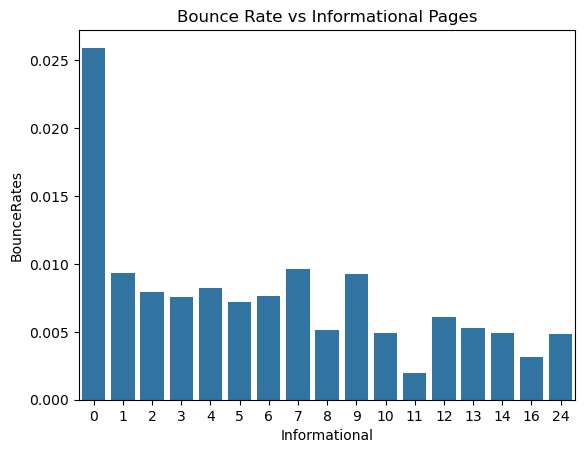

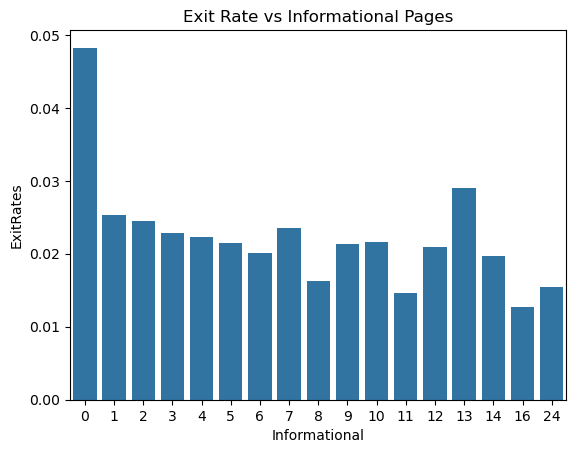

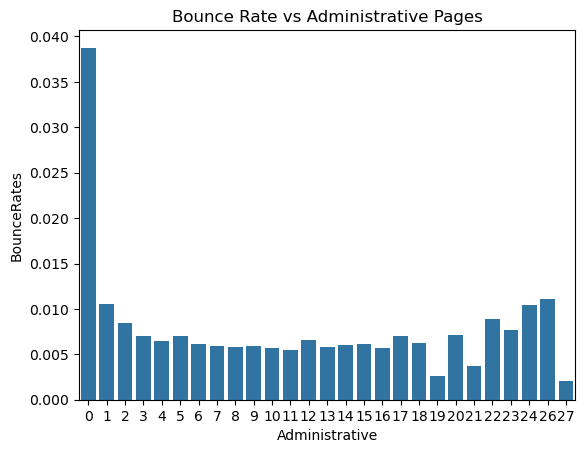

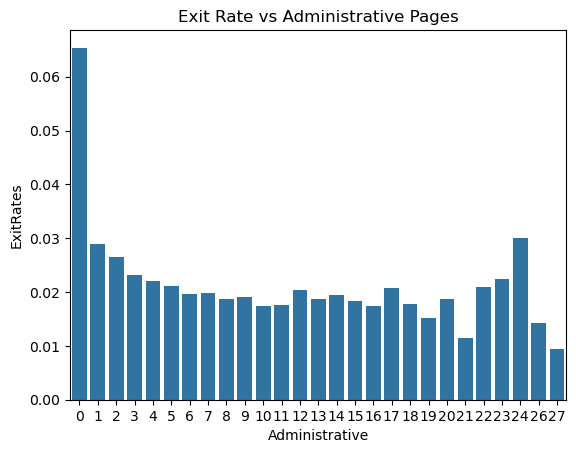

In [436]:
for col in ["Informational", "Administrative"]:
    sns.barplot(data=merged_df, x=col, y="BounceRates", errorbar=None)
    plt.title(f"Bounce Rate vs {col} Pages")
    plt.show()
    
    sns.barplot(data=merged_df, x=col, y="ExitRates", errorbar=None)
    plt.title(f"Exit Rate vs {col} Pages")
    plt.show()


<Axes: xlabel='Administrative_Duration', ylabel='BounceRates'>

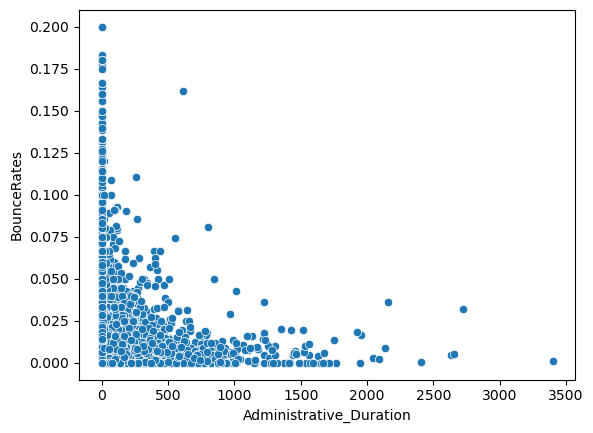

In [454]:
sns.scatterplot(merged_df, x="Administrative_Duration", y = "BounceRates")

There are some interesting traits to note about this bounce/ exit rates. First, it is observed that users were mostly likely to leave a web page on viewing the product information. This could suggest that reading the product details was enough for a user to determine if they were interested in viewing more/ purchasing an product (to be continued)

<Axes: xlabel='Weekend', ylabel='Revenue'>

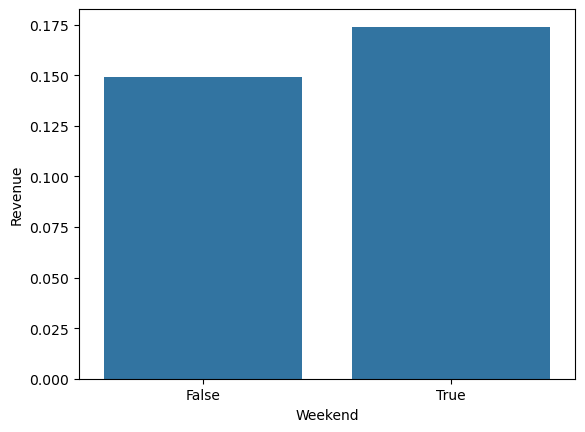

In [479]:
sns.barplot(merged_df, x= "Weekend", y = "Revenue", errorbar=None)

<Axes: xlabel='Weekend', ylabel='PageValues'>

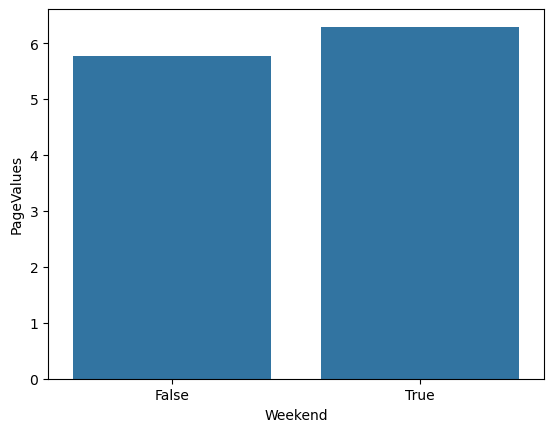

In [477]:
sns.barplot(merged_df, x= "Weekend", y = "PageValues", errorbar=None)

<Axes: xlabel='Weekend', ylabel='count'>

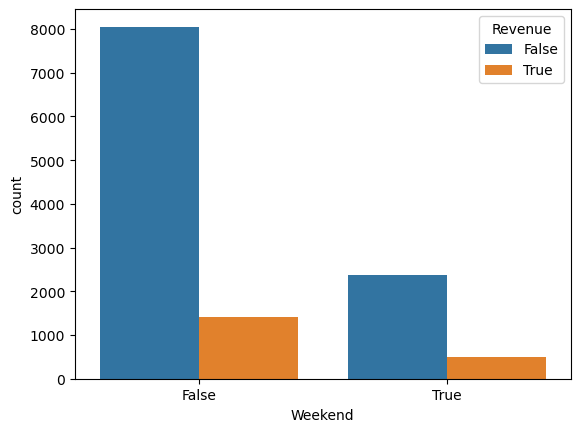

In [475]:
sns.countplot(merged_df, x= "Weekend", hue = "Revenue")

<Axes: xlabel='SpecialDay', ylabel='count'>

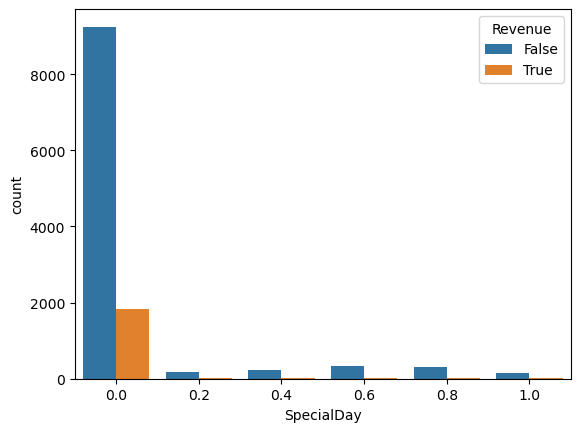

In [481]:
sns.countplot(merged_df, x= "SpecialDay", hue = "Revenue")